In [1]:
import gc
import warnings
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from importlib import reload
from pandas import Timestamp
from icedef import statoil_arcticnet_data as sd
from icedef import test_case, plot, simulator, metocean

try:
    map_

except NameError:
    map_ = plot.get_map()

In [2]:
plt.rcParams['figure.figsize'] = (6, 6)

SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 14

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [3]:
beacon_id = '90679'  # good berg
#beacon_id = '50519'  # bad berg

df = sd.get_beacon_df(beacon_id=beacon_id)
    
day = 1

if beacon_id == '90679':
    start_index = 816
elif beacon_id == '50519':
    start_index = 537

start_time = df.DataDate_UTC.values[start_index]
start_time += np.timedelta64(day - 1, 'D')
end_time = start_time + np.timedelta64(25, 'h')

tc = test_case.TestCase(beacon_id=beacon_id, start_time=start_time, end_time=end_time)

In [4]:
sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
sim.testcase = tc
sim.results.map = map_ 
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.results.add_xy_to_existing_dataset('reference')

# No Current Constant Wind

In [60]:
label = 'no_current_constant_wind'
sim.start_velocity = 0.2, 0
sim.set_constant_current((0, 0))
sim.set_constant_wind((10, 0))
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

In [61]:
xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values 
xs -= xs[0]
ys -= ys[0]

Faxs = sim.results.data[label]['Fax'].values
Fays = sim.results.data[label]['Fay'].values
Fwxs = sim.results.data[label]['Fwx'].values
Fwys = sim.results.data[label]['Fwy'].values
Fcxs = sim.results.data[label]['Fcx'].values
Fcys = sim.results.data[label]['Fcy'].values
Fwpxs = sim.results.data[label]['Fwpx'].values
Fwpys = sim.results.data[label]['Fwpy'].values

gap = 50

xs_ = xs[::gap]
ys_ = ys[::gap]
Faxs_ = Faxs[::gap]
Fays_ = Fays[::gap]
Fwxs_ = Fwxs[::gap]
Fwys_ = Fwys[::gap]
Fcxs_ = Fcxs[::gap]
Fcys_ = Fcys[::gap]
Fwpxs_ = Fwpxs[::gap]
Fwpys_ = Fwpys[::gap]

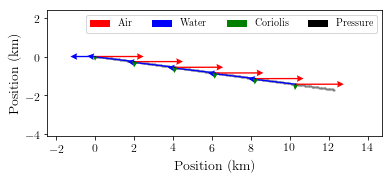

In [62]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.margins(x=0.2, y=1.4)
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

ax.scatter(xs, ys, s=1, color='grey')

scale = 5e6
width = 4e-3
headwidth = 5

kwargs = {'scale': scale, 'width': width, 'headwidth': headwidth}

ax.quiver(xs_, ys_, Faxs_, Fays_, color='red', label='Air', **kwargs)
ax.quiver(xs_, ys_, Fwxs_, Fwys_, color='blue', label='Water', **kwargs)
ax.quiver(xs_, ys_, Fcxs_, Fcys_, color='green', label='Coriolis', **kwargs)
ax.quiver(xs_, ys_, Fwpxs_, Fwpys_, color='black', label='Pressure', **kwargs)

ax.legend(ncol=4)

fig.savefig('./plots/no_current_constant_wind.pdf', bbox_inches='tight')
plt.show()

# No Wind Constant Current 

In [63]:
label = 'no_wind_constant_current'
sim.start_velocity = 0.2, 0
sim.set_constant_current((0.3, 0))
sim.set_constant_wind((0, 0))
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

In [64]:
xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values 
xs -= xs[0]
ys -= ys[0]

Faxs = sim.results.data[label]['Fax'].values
Fays = sim.results.data[label]['Fay'].values
Fwxs = sim.results.data[label]['Fwx'].values
Fwys = sim.results.data[label]['Fwy'].values
Fcxs = sim.results.data[label]['Fcx'].values
Fcys = sim.results.data[label]['Fcy'].values
Fwpxs = sim.results.data[label]['Fwpx'].values
Fwpys = sim.results.data[label]['Fwpy'].values

gap = 50

xs_ = xs[::gap]
ys_ = ys[::gap]
Faxs_ = Faxs[::gap]
Fays_ = Fays[::gap]
Fwxs_ = Fwxs[::gap]
Fwys_ = Fwys[::gap]
Fcxs_ = Fcxs[::gap]
Fcys_ = Fcys[::gap]
Fwpxs_ = Fwpxs[::gap]
Fwpys_ = Fwpys[::gap]

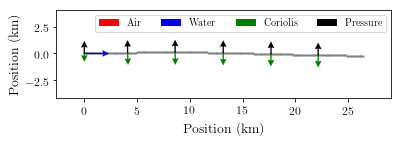

In [65]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.margins(x=0.1, y=12)
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

ax.scatter(xs, ys, s=1, color='grey')

scale = 5e6
width = 4e-3
headwidth = 5

kwargs = {'scale': scale, 'width': width, 'headwidth': headwidth}

ax.quiver(xs_, ys_, Faxs_, Fays_, color='red', label='Air', **kwargs)
ax.quiver(xs_, ys_, Fwxs_, Fwys_, color='blue', label='Water', **kwargs)
ax.quiver(xs_, ys_, Fcxs_, Fcys_, color='green', label='Coriolis', **kwargs)
ax.quiver(xs_, ys_, Fwpxs_, Fwpys_, color='black', label='Pressure', **kwargs)

ax.legend(ncol=4)

fig.savefig('./plots/no_wind_constant_current.pdf', bbox_inches='tight')
plt.show()

# No Current or Wind

In [75]:
label = 'no_wind_or_current'
title = 'No Current or Wind'
sim.start_velocity = 0.1, 0
sim.set_constant_current((0, 0))
sim.set_constant_wind((0, 0))
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

In [76]:
xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values 
xs -= xs[0]
ys -= ys[0]

Faxs = sim.results.data[label]['Fax'].values
Fays = sim.results.data[label]['Fay'].values
Fwxs = sim.results.data[label]['Fwx'].values
Fwys = sim.results.data[label]['Fwy'].values
Fcxs = sim.results.data[label]['Fcx'].values
Fcys = sim.results.data[label]['Fcy'].values
Fwpxs = sim.results.data[label]['Fwpx'].values
Fwpys = sim.results.data[label]['Fwpy'].values

gap = 50

xs_ = xs[::gap]
ys_ = ys[::gap]
Faxs_ = Faxs[::gap]
Fays_ = Fays[::gap]
Fwxs_ = Fwxs[::gap]
Fwys_ = Fwys[::gap]
Fcxs_ = Fcxs[::gap]
Fcys_ = Fcys[::gap]
Fwpxs_ = Fwpxs[::gap]
Fwpys_ = Fwpys[::gap]

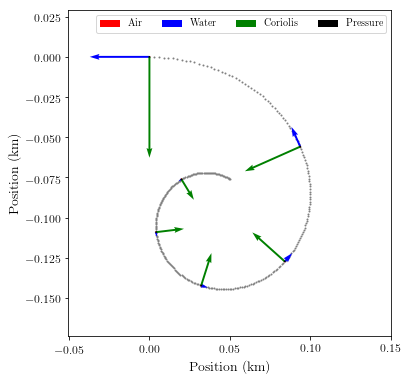

In [79]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.margins(x=0.5, y=0.2)
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

ax.scatter(xs, ys, s=1, color='grey')

scale = 2e4
width = 6e-3
headwidth = 3

kwargs = {'scale': scale, 'width': width, 'headwidth': headwidth}

ax.quiver(xs_, ys_, Faxs_, Fays_, color='red', label='Air', **kwargs)
ax.quiver(xs_, ys_, Fwxs_, Fwys_, color='blue', label='Water', **kwargs)
ax.quiver(xs_, ys_, Fcxs_, Fcys_, color='green', label='Coriolis', **kwargs)
ax.quiver(xs_, ys_, Fwpxs_, Fwpys_, color='black', label='Pressure', **kwargs)

ax.legend(ncol=4)

fig.savefig('./plots/no_wind_or_current.pdf', bbox_inches='tight')

plt.show()

# Constant Current and Wind

In [69]:
label = 'constant_current_and_wind'
sim.start_velocity = 0.1, 0
sim.set_constant_current((0.3, 0))
sim.set_constant_wind((10, 0))
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

In [70]:
xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values 
xs -= xs[0]
ys -= ys[0]

Faxs = sim.results.data[label]['Fax'].values
Fays = sim.results.data[label]['Fay'].values
Fwxs = sim.results.data[label]['Fwx'].values
Fwys = sim.results.data[label]['Fwy'].values
Fcxs = sim.results.data[label]['Fcx'].values
Fcys = sim.results.data[label]['Fcy'].values
Fwpxs = sim.results.data[label]['Fwpx'].values
Fwpys = sim.results.data[label]['Fwpy'].values

gap = 50

xs_ = xs[::gap]
ys_ = ys[::gap]
Faxs_ = Faxs[::gap]
Fays_ = Fays[::gap]
Fwxs_ = Fwxs[::gap]
Fwys_ = Fwys[::gap]
Fcxs_ = Fcxs[::gap]
Fcys_ = Fcys[::gap]
Fwpxs_ = Fwpxs[::gap]
Fwpys_ = Fwpys[::gap]

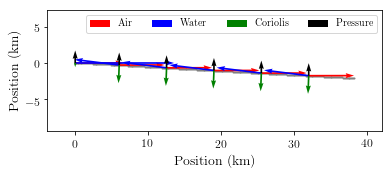

In [71]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.margins(x=0.1, y=3.5)
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

ax.scatter(xs, ys, s=1, color='grey')

scale = 5e6
width = 5e-3
headwidth = 3

kwargs = {'scale': scale, 'width': width, 'headwidth': headwidth}

ax.quiver(xs_, ys_, Faxs_, Fays_, color='red', label='Air', **kwargs)
ax.quiver(xs_, ys_, Fwxs_, Fwys_, color='blue', label='Water', **kwargs)
ax.quiver(xs_, ys_, Fcxs_, Fcys_, color='green', label='Coriolis', **kwargs)
ax.quiver(xs_, ys_, Fwpxs_, Fwpys_, color='black', label='Pressure', **kwargs)

ax.legend(ncol=4)

fig.savefig('./plots/constant_current_and_wind.pdf', bbox_inches='tight')

plt.show()

# Ekman

In [156]:
sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
sim.testcase = tc
sim.results.map = map_ 
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.results.add_xy_to_existing_dataset('reference')

In [157]:
# No Ekman
ekman = False
kwargs = {'ekman': ekman}
sim.run_simulation(label='no_ekman', **kwargs)
sim.results.add_xy_to_existing_dataset('no_ekman')

# Ekman to depth of 100 m
ekman = True
kwargs = {'ekman': ekman}
sim.run_simulation(label='ekman_100', **kwargs)
sim.results.add_xy_to_existing_dataset('ekman_100')

# Ekman to depth of 1000 m
ekman = True
depth_vec = np.arange(0, -1100, -100)
kwargs = {'ekman': ekman, 'depth_vec': depth_vec}
sim.run_simulation(label='ekman_1000', **kwargs)
sim.results.add_xy_to_existing_dataset('ekman_1000')

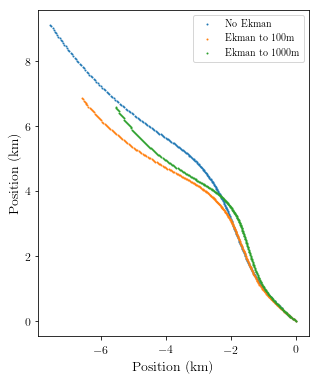

In [165]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
#ax.margins(x=0.1, y=2)
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

labels = ['No Ekman', 'Ekman to 100m', 'Ekman to 1000m']

i = 0

for label in ['no_ekman', 'ekman_100', 'ekman_1000']:
    
    xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values
    xs -= xs[0]
    ys -= ys[0]
    
    plt.scatter(xs, ys, s=1, label=labels[i])
    
    i += 1
    
plt.legend()

fig.savefig('./plots/ekman_test.pdf', bbox_inches='tight')

plt.show()

# Varying Berg Size

In [171]:
sizes = ['SM', 'MED', 'LG']
labels = ['SM', 'MED', 'LG']

for size, label in zip(sizes, labels):

    sim.iceberg_size = size
    sim.run_simulation(label=label)
    sim.results.add_xy_to_existing_dataset(label)

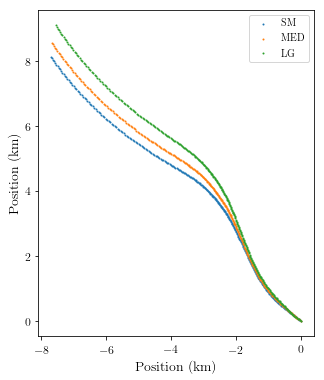

In [172]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

for label in labels:
    
    xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values
    xs -= xs[0]
    ys -= ys[0]
    
    plt.scatter(xs, ys, s=1, label=label)
    
    i += 1
    
plt.legend()

fig.savefig('./plots/varying_berg_size.pdf', bbox_inches='tight')

plt.show()

# Varying Berg Shape

In [173]:
shapes = ['TAB', 'NTAB', 'DOM', 'PIN', 'WDG', 'DD', 'BLK']
labels = ['TAB', 'NTAB', 'DOM', 'PIN', 'WDG', 'DD', 'BLK']

for shape, label in zip(shapes, labels):

    sim.iceberg_shape = shape
    sim.run_simulation(label=label)
    sim.results.add_xy_to_existing_dataset(label)

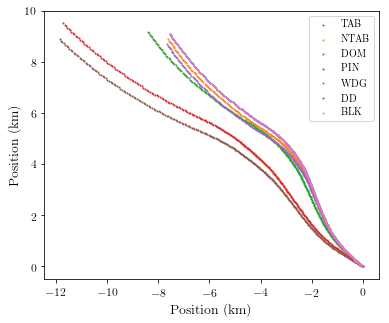

In [174]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

for label in labels:
    
    xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values
    xs -= xs[0]
    ys -= ys[0]
    
    plt.scatter(xs, ys, s=1, label=label)
    
    i += 1
    
plt.legend()

fig.savefig('./plots/varying_berg_shape.pdf', bbox_inches='tight')

plt.show()

# Effect of changing timestepper

In [176]:
from icedef import timesteppers

In [184]:
sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
sim.testcase = tc
sim.results.map = map_ 
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.results.add_xy_to_existing_dataset('reference')

In [188]:
sim.results.add_forces = False

label = 'euler'
sim.time_stepper = timesteppers.euler
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)

label = 'rk2'
sim.time_stepper = timesteppers.rk2
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)

label = 'rk4'
sim.time_stepper = timesteppers.rk4
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)

label = 'ab2'
sim.time_stepper = timesteppers.ab2
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)

label = 'ab3'
sim.time_stepper = timesteppers.ab3
sim.run_simulation(label=label)
sim.results.add_xy_to_existing_dataset(label)

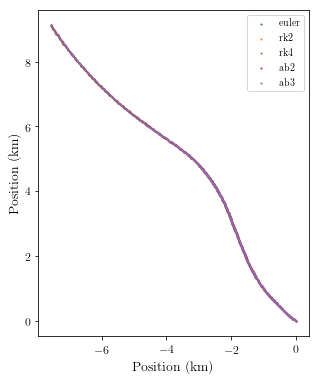

In [189]:
labels = ['euler', 'rk2', 'rk4', 'ab2', 'ab3']
    
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlabel('Position (km)')
ax.set_ylabel('Position (km)')

for label in labels:
    
    xs, ys = sim.results.data[label]['easting'].values, sim.results.data[label]['northing'].values
    xs -= xs[0]
    ys -= ys[0]
    
    plt.scatter(xs, ys, s=1, label=label)
    
    i += 1
    
plt.legend()

fig.savefig('./plots/varying_time_stepper.pdf', bbox_inches='tight')

plt.show()